### TUGAS PRAKTIKUM

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
# Load data
iris = load_iris()
X = iris.data
y_true = iris.target

# Normalisasi data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # warna hitam untuk noise
        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


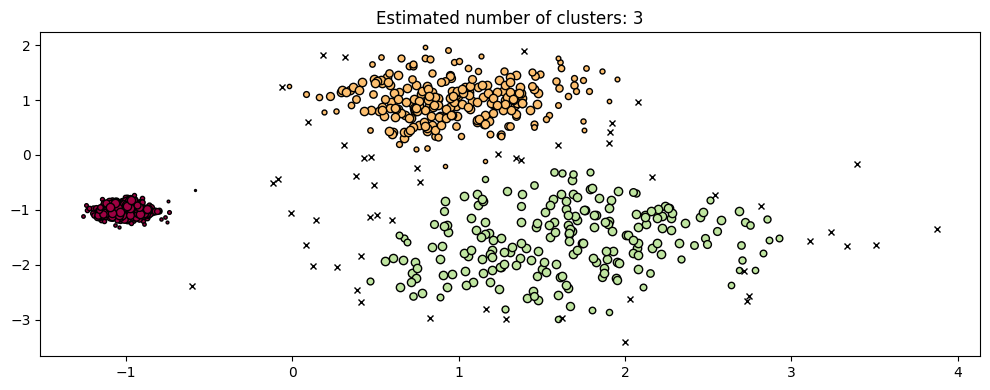

In [ ]:
clusterer = hdbscan.HDBSCAN()
clusterer.fit(X)

plot(X[:, :2], clusterer.labels_, clusterer.probabilities_)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

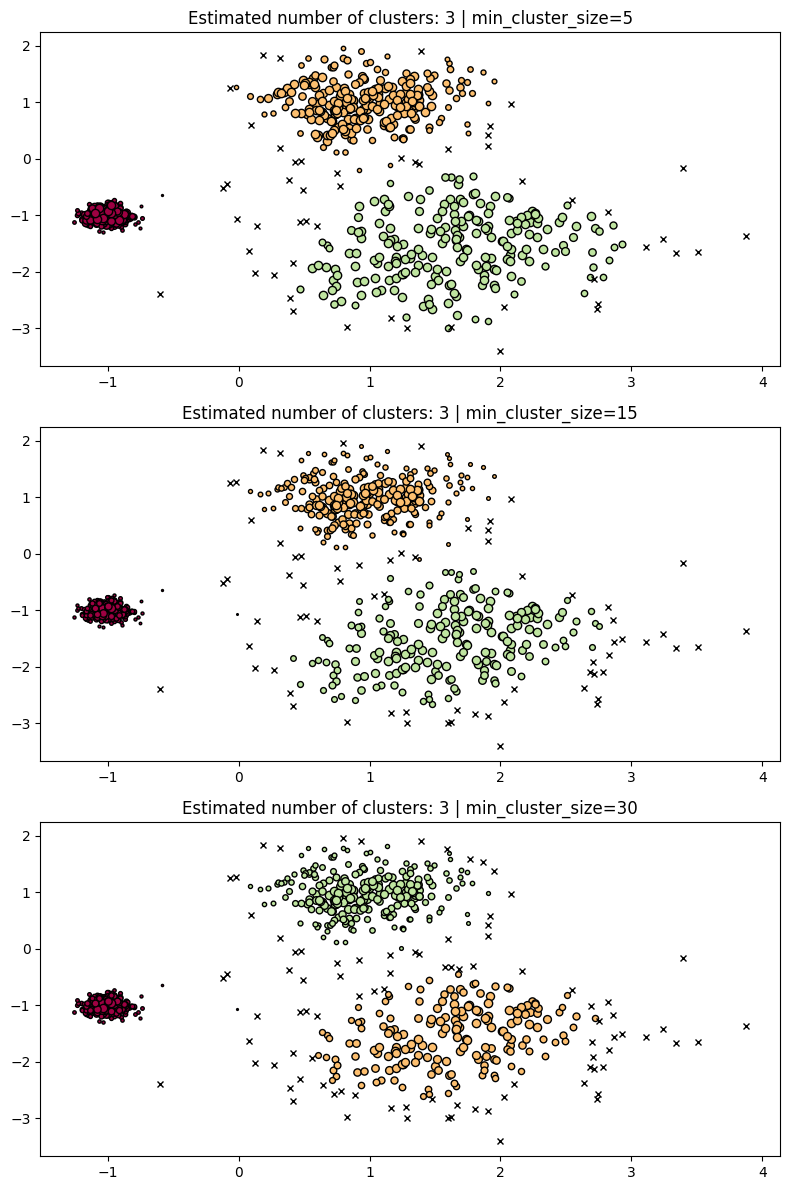

In [ ]:
PARAMS = ({"min_cluster_size": 5}, {"min_cluster_size": 15}, {"min_cluster_size": 30})

fig, axes = plt.subplots(3, 1, figsize=(8, 12))
for i, param in enumerate(PARAMS):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X[:, :2], hdb.labels_, hdb.probabilities_, param, ax=axes[i])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

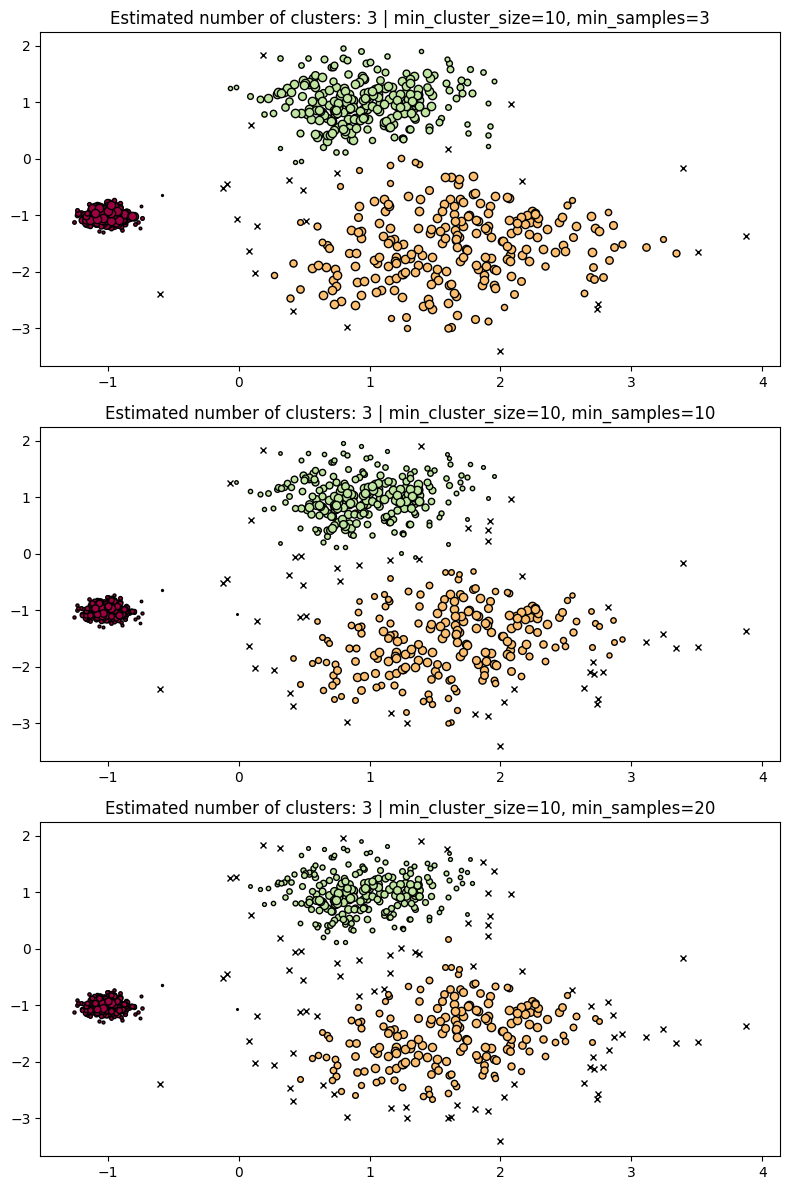

In [ ]:
PARAMS = (
    {"min_cluster_size": 10, "min_samples": 3},
    {"min_cluster_size": 10, "min_samples": 10},
    {"min_cluster_size": 10, "min_samples": 20},
)

fig, axes = plt.subplots(3, 1, figsize=(8, 12))
for i, param in enumerate(PARAMS):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X[:, :2], hdb.labels_, hdb.probabilities_, param, ax=axes[i])


In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, clusterer.labels_)
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.6451356578011034


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbi_score = davies_bouldin_score(X, clusterer.labels_)
print(f"Davies-Bouldin Index: {dbi_score}")


Davies-Bouldin Index: 2.1284499880816123


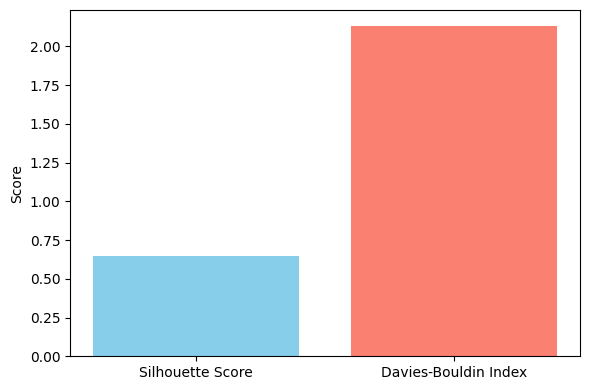

In [ ]:
scores = {
    "Silhouette Score": sil_score,
    "Davies-Bouldin Index": dbi_score
}

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(scores.keys(), scores.values(), color=['skyblue', 'salmon'])
ax.set_ylabel("Score")
plt.tight_layout()
plt.show()


In [ ]:
n_clusters = len(set(clusterer.labels_)) - (1 if -1 in clusterer.labels_ else 0)
n_noise = list(clusterer.labels_).count(-1)

print(f"Jumlah cluster terbentuk : {n_clusters}")
print(f"Banyaknya noise : {n_noise}")

Jumlah cluster terbentuk : 3
Banyaknya noise : 52


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

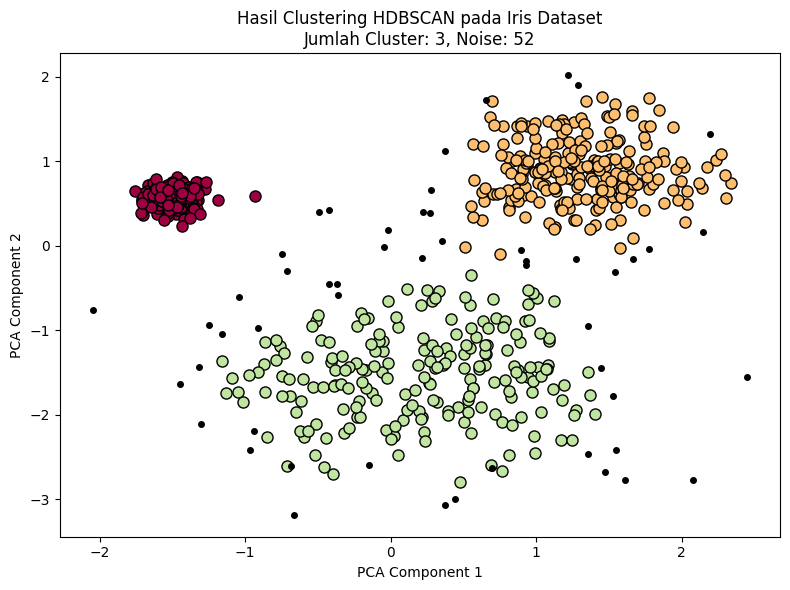

In [ ]:
plt.figure(figsize=(8, 6))
unique_labels = set(clusterer.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # warna hitam untuk noise
    class_member_mask = (clusterer.labels_ == k)
    xy = X_pca[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8 if k != -1 else 4)

plt.title(f'Hasil Clustering HDBSCAN pada Iris Dataset\n'
          f'Jumlah Cluster: {n_clusters}, Noise: {n_noise}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()

Analisis hasil: Jumlah cluster yang terbentuk sesuai dengan jumlah kelas asli pada dataset iris yaitu 3, namun terdapat noise sejumlah 52 sampel menunjukkan data yang tidak cukup kuat masuk ke kluster manapun yang menunjukkan bahwa sebagian data berada di batas 2 kelompok. Hasil ini masih merepresentasikan terhadap struktur alami dataset iris.